In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

from mmdet.apis import inference_detector, init_detector, show_result_pyplot


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

1.7.1 True
2.12.0
10.2
GCC 7.3


In [2]:
# Choose to use a config and initialize the detector
config = '5_objects.py'
# Setup a checkpoint file to load
checkpoint = 'epoch_12.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

Use load_from_local loader


In [3]:
# Use the detector to do inference
img = 'frame0016.jpg'
result = inference_detector(model, img)

/home/travis/Documents/tudelft/2021q4/RO47007/tiago_ws/src/demo/find_object/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


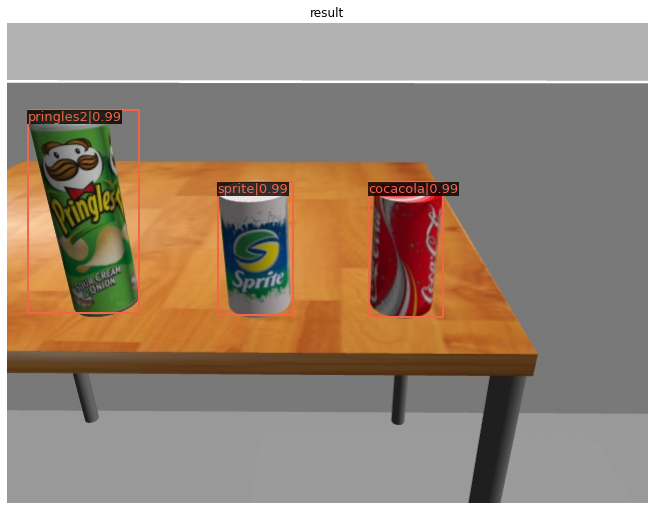

In [4]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

[array([], shape=(0, 5), dtype=float32), array([[361.77588   , 159.29088   , 435.07462   , 294.39444   ,
          0.99255824]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([[ 20.83224  ,  87.59792  , 131.10384  , 290.22006  ,   0.9937449]],
      dtype=float32), array([[210.92795   , 159.75218   , 285.12173   , 292.45486   ,
          0.99240315]], dtype=float32)]


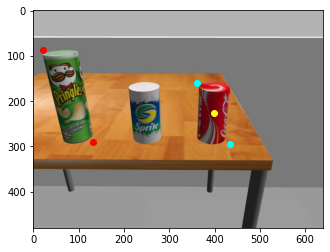

In [21]:
print(result)

import cv2
from matplotlib import pyplot as plt
i = cv2.imread('frame0016.jpg')
i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(i)
plt.scatter(361.77588, 159.29088, color='cyan') #px, py(upper left corner)
plt.scatter(435.07462, 294.39444, color='cyan') #px, py(lower right corner)
plt.scatter((361.77588 + 435.07462)/2, (159.29088 + 294.39444)/2, color='yellow') #centriod

plt.scatter(20.83224, 87.59792, color='red') #px, py(upper left corner)
plt.scatter(131.10384, 290.22006, color='red') #px, py(lower right corner)

plt.show()